### TITANIC DATASET: DATA VISUALIZATION AND PRESENTATION

A comprehensive analysis of passenger survival patterns

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging

from sys import stderr

warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8')
# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
logging.basicConfig(stream=stderr, level="INFO")

In [14]:
def spacing(n=50):
    print("=" * n)

### Loading the Data

In [25]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
).reset_index(drop=True)
df = df.rename(columns={col: col.lower() for col in df.columns})

train_data = df.copy()
spacing()
print("Dataframe Overview")
spacing()
df.head()



Dataframe Overview


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(f"Dataset Shape: {df.shape}")
print(f"Total Passengers: {len(df)}")

# Display basic information about the dataset
spacing()
print("DATASET OVERVIEW")
spacing()

print("\nFirst 5 rows:")
display(df.head())
spacing()

print("Dataset Info:")
print(df.info())

spacing()
display("Statistical Summary (Numerical):")
display(df.describe())
display("Statistical Summary (Categories):")
display(train_data.describe(include='O'))
spacing()
print("\n🔢 Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame(
    {"Missing Count": missing_data, "Percentage": missing_percent}
).sort_values("Missing Count", ascending=False)
spacing()
display(missing_df[missing_df["Missing Count"] > 0])

Dataset Shape: (891, 12)
Total Passengers: 891
DATASET OVERVIEW

First 5 rows:


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


'Statistical Summary (Numerical):'

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Statistical Summary (Categories):'

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644



🔢 Missing Values:


,Missing Count,Percentage
cabin,687,77.104377
age,177,19.865320
embarked,2,0.224467


### DATA PREPROCESSING AND CLEANING

#### Handling 177 Null Values in Age

In [26]:
df["title"] = df["name"].str.extract(" ([A-Za-z]+)\.", expand=False)

title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Countess": "Mrs",
    "Ms": "Mrs",
    "Lady": "Mrs",
    "Jonkheer": "Officer",
    "Don": "Mr",
    "Dona": "Mrs",
    "Mme": "Mrs",
    "Capt": "Officer",
    "Sir": "Mr",
}

df["title"] = df["title"].map(title_mapping).fillna("Other")
spacing()
print("Before Imputation (Age:NA):", df["age"].isna().sum())
df.loc[df["age"].isna(), "age"] = df.loc[df["age"].isna()]["title"].map(
    df.groupby("title")["age"].mean().astype(int)
)
print("After Imputation (Age:NA):", df["age"].isna().sum())
spacing()

Before Imputation (Age:NA): 177
After Imputation (Age:NA): 0


Handling more missing values

In [27]:
df["title"] = df["name"].str.extract(" ([A-Za-z]+)\.", expand=False)

title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Countess": "Mrs",
    "Ms": "Mrs",
    "Lady": "Mrs",
    "Jonkheer": "Officer",
    "Don": "Mr",
    "Dona": "Mrs",
    "Mme": "Mrs",
    "Capt": "Officer",
    "Sir": "Mr",
}
df["title"] = df["title"].map(title_mapping).fillna("Other")
spacing()
print(df['title'].value_counts())
spacing()
print(df.groupby("title")["age"].mean().astype(int).apply(lambda x: f"{x} years"))
spacing()

title
Mr         519
Miss       184
Mrs        129
Master      40
Officer     19
Name: count, dtype: int64
title
Master      4 years
Miss       21 years
Mr         32 years
Mrs        35 years
Officer    46 years
Name: age, dtype: object


In [28]:
# Imputing other remaining null columns

# Embarked: Fill with mode (most common port)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Deck: Extract from cabin and fill missing with 'Unknown'
df["deck"] = df["cabin"].str[0] if "cabin" in df.columns else "U"
df["deck"] = df["deck"].fillna("U")
df.drop(["cabin"], axis=1, inplace=True)
print("After handling all the null columns")
display(df.isna().sum())

After handling all the null columns


passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
deck           0
dtype: int64

Crafting new features for better analysis

In [29]:
# Age groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"],
)
spacing()
print("Counts for Age Groups")
print(df["age_group"].value_counts())
spacing()

# Family size
df["family_size"] = df["sibsp"] + df["parch"] + 1

# Family size categories
df["family_category"] = pd.cut(
    df["family_size"],
    bins=[0, 1, 4, 11],
    labels=["Alone", "Small Family", "Large Family"],
)
spacing()
print("Counts for Family Categories")
print(df["family_category"].value_counts())
spacing()
# Fare per person (to account for family tickets)
df["fare_per_person"] = df["fare"] / df["family_size"]

Counts for Age Groups
age_group
Young Adult    530
Adult          196
Child           73
Teen            70
Senior          22
Name: count, dtype: int64
Counts for Family Categories
family_category
Alone           537
Small Family    292
Large Family     62
Name: count, dtype: int64


### Preparing Data count 

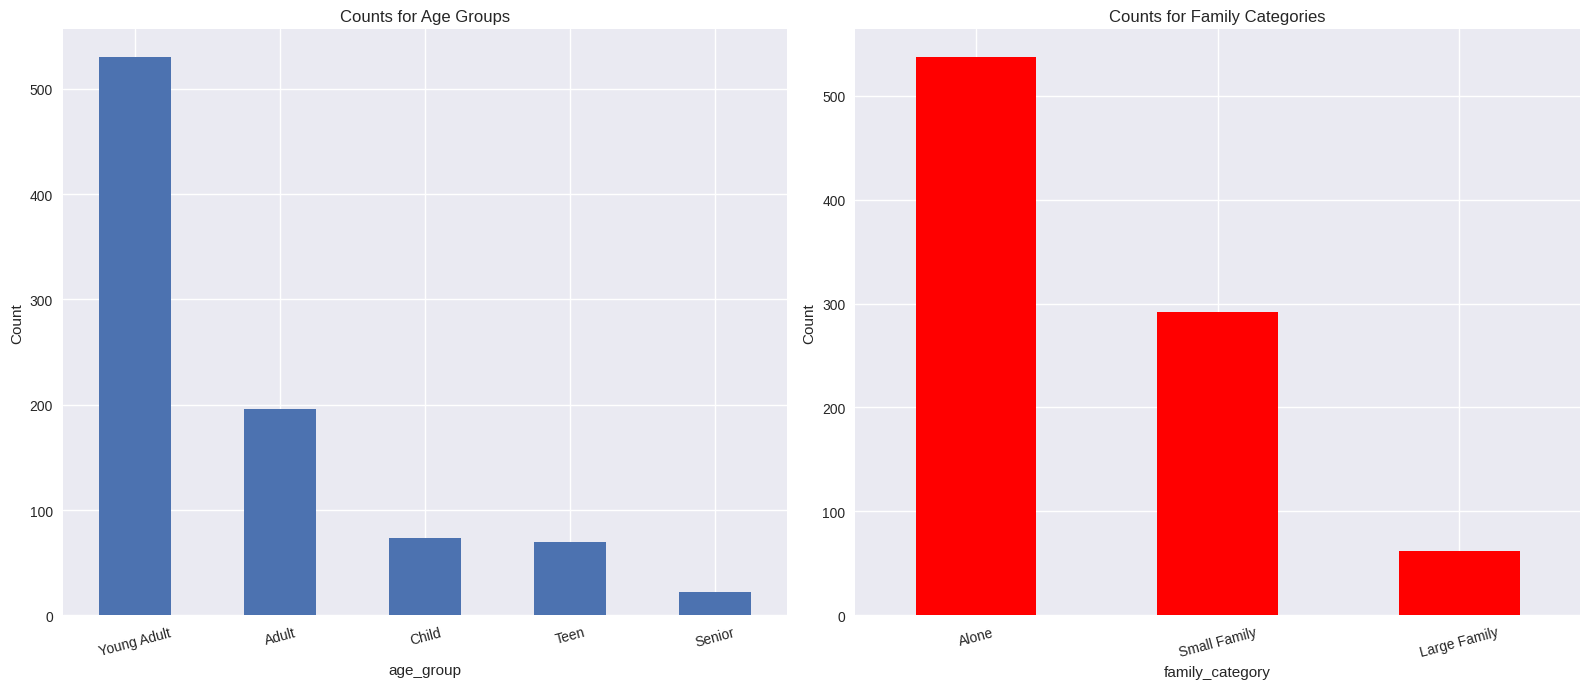

In [31]:
# Prepare count data
age_counts = df["age_group"].value_counts()
family_counts = df["family_category"].value_counts()

# Set up the figure
plt.figure(figsize=(16, 7))

# Age Group Counts
plt.subplot(1, 2, 1)
age_counts.plot(kind='bar',)
plt.title("Counts for Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=15)

# Family Category Counts
plt.subplot(1, 2, 2)
family_counts.plot(kind='bar', color='red')
plt.title("Counts for Family Categories")
plt.ylabel("Count")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

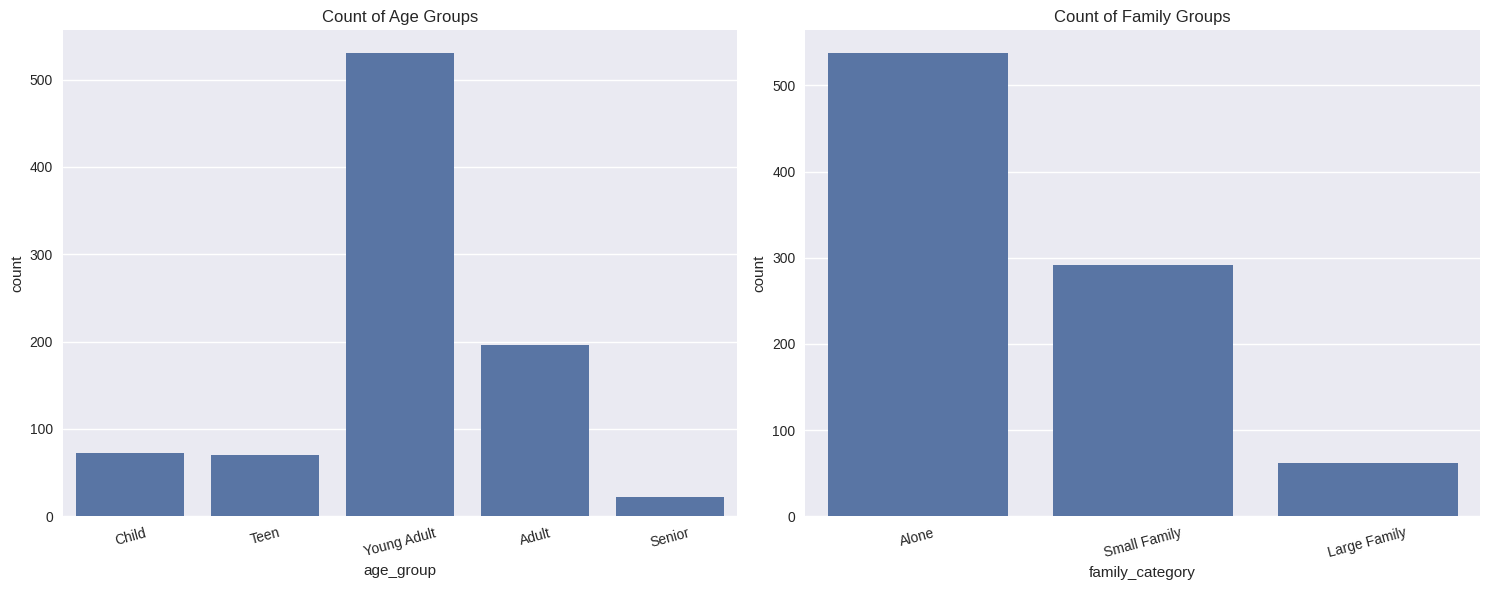

In [37]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.countplot(data=df, x="age_group")#,stat='percent'
plt.xticks(rotation=15)  # Optional: rotate x labels if needed
plt.title("Count of Age Groups")

plt.subplot(1,2,2)
sns.countplot(data=df, x="family_category")#,stat='percent')
plt.xticks(rotation=15)  # Optional: rotate x labels if needed
plt.title("Count of Family Groups")

plt.tight_layout()
plt.show()

Histogram for Age Distribution

Text(0.5, 1.0, 'Histogram of Age Distribution')

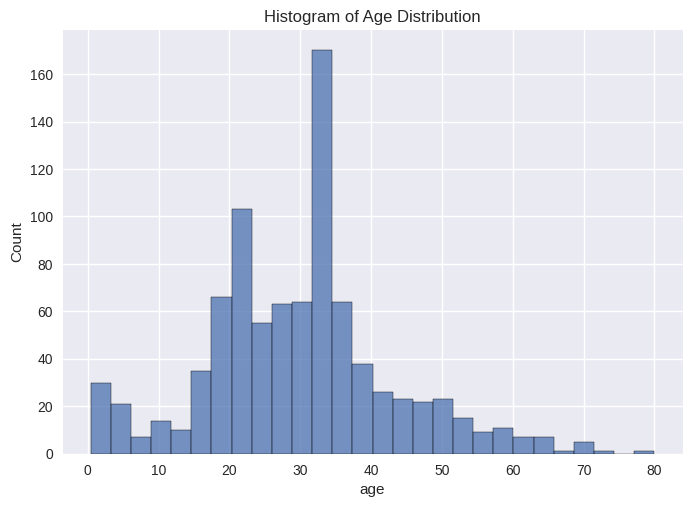

In [38]:
sns.histplot(data=df, x="age")
plt.title("Histogram of Age Distribution")

#### SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)

EXPLORATORY DATA ANALYSIS

📊 SURVIVAL OVERVIEW
------------------------------
Overall Survival Rate: 38.38%
Survivors: 342
Non-survivors: 549


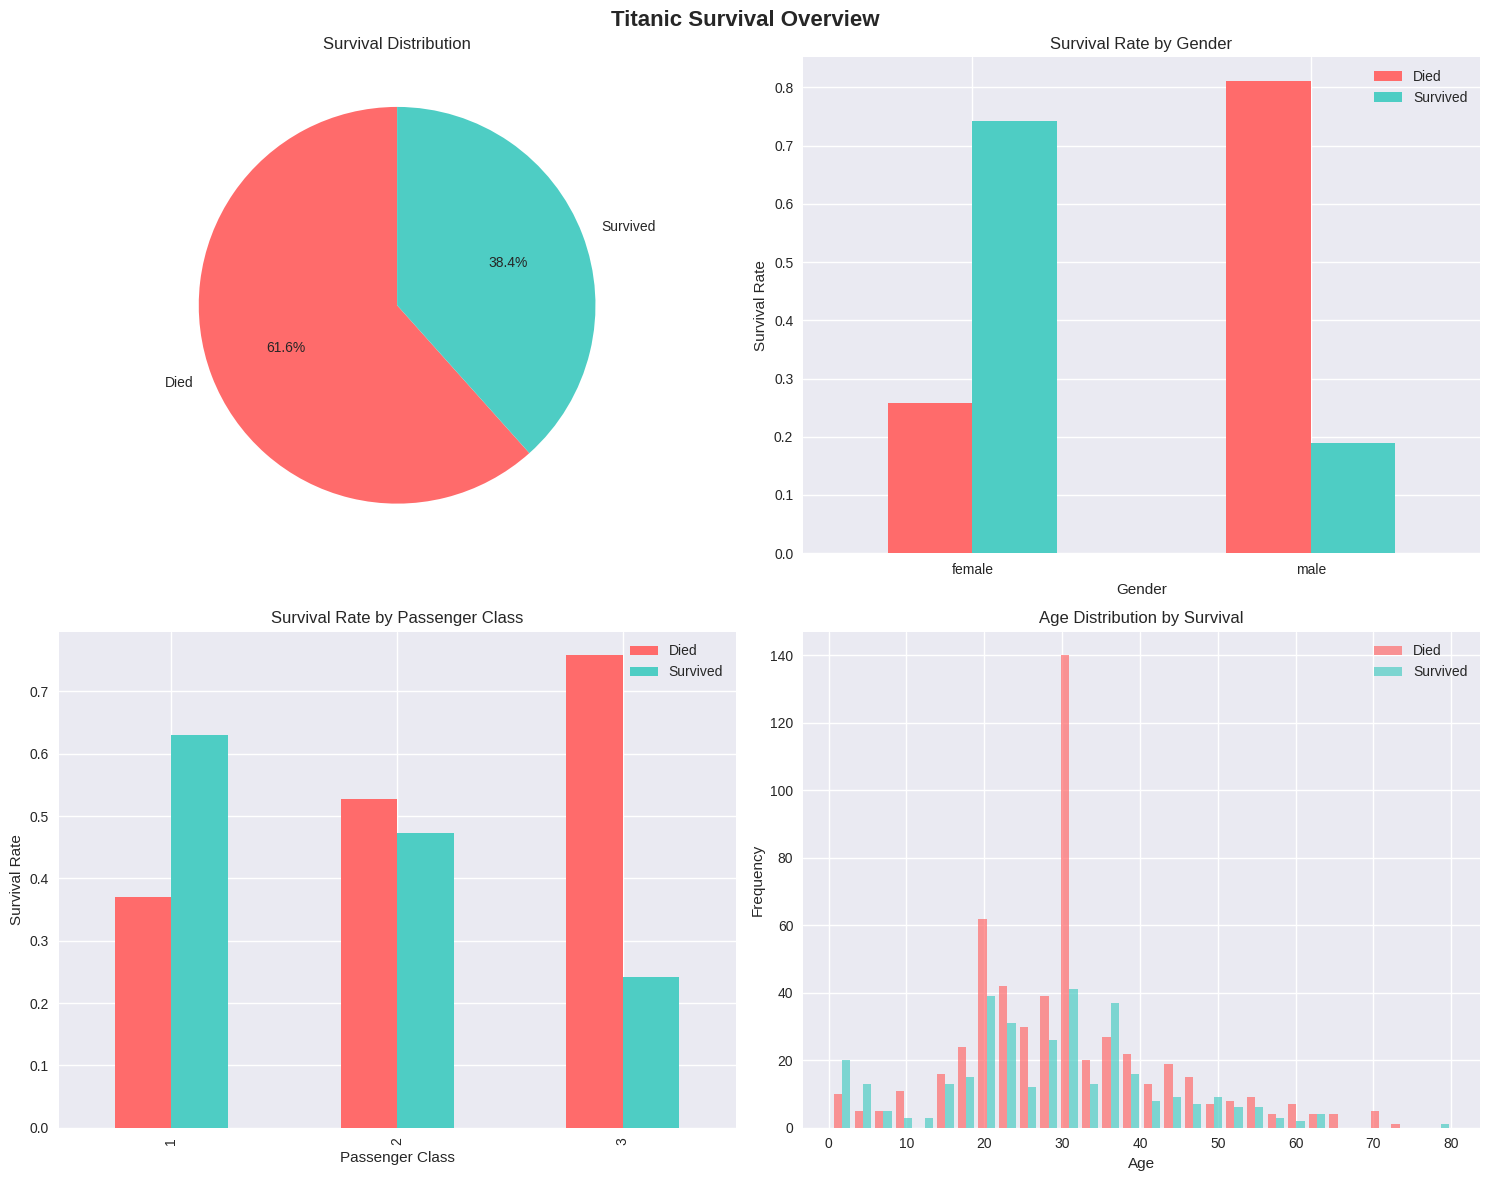

In [ ]:
print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Set up the plotting environment
fig_size = (15, 10)
plt.rcParams['figure.figsize'] = fig_size

# 3.1 Survival Overview
print("\n📊 SURVIVAL OVERVIEW")
print("-" * 30)

survival_counts = df['survived'].value_counts()
survival_rate = df['survived'].mean()

print(f"Overall Survival Rate: {survival_rate:.2%}")
print(f"Survivors: {survival_counts[1]}")
print(f"Non-survivors: {survival_counts[0]}")

# Create survival overview visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Titanic Survival Overview', fontsize=16, fontweight='bold')

# Survival count
axes[0,0].pie(survival_counts.values, labels=['Died', 'Survived'], 
              autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Survival Distribution')

# Survival by gender
survival_by_gender = pd.crosstab(df['sex'], df['survived'], normalize='index')
survival_by_gender.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Survival Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# Survival by class
survival_by_class = pd.crosstab(df['pclass'], df['survived'], normalize='index')
survival_by_class.plot(kind='bar', ax=axes[1,0], color=['#ff6b6b', '#4ecdc4'])
axes[1,0].set_title('Survival Rate by Passenger Class')
axes[1,0].set_xlabel('Passenger Class')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].legend(['Died', 'Survived'])

# Age distribution by survival
axes[1,1].hist([df[df['survived']==0]['age'].dropna(), 
                df[df['survived']==1]['age'].dropna()], 
               bins=30, alpha=0.7, label=['Died', 'Survived'], color=['#ff6b6b', '#4ecdc4'])
axes[1,1].set_title('Age Distribution by Survival')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()



### 3.2 DEMOGRAPHIC ANALYSIS


👥 DEMOGRAPHIC ANALYSIS
------------------------------


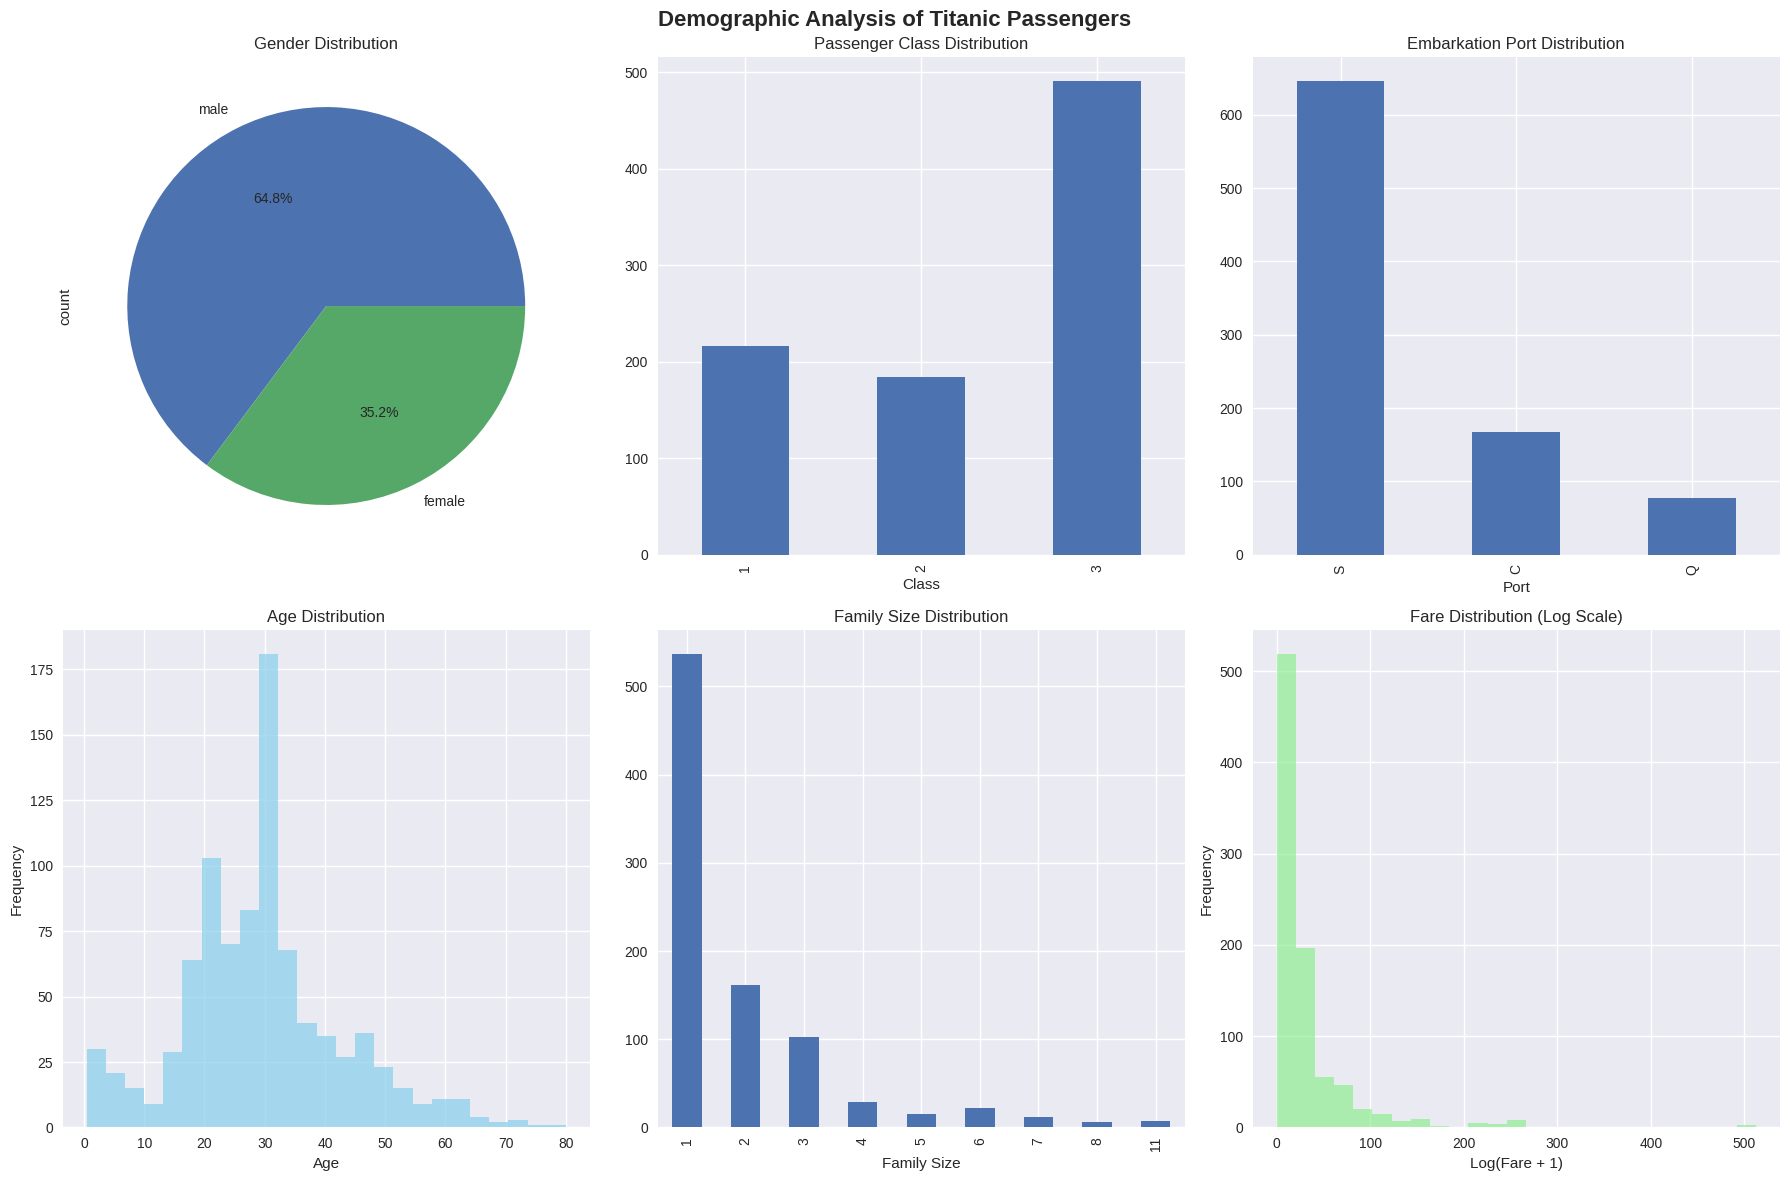

In [48]:
# 3.2 Demographic Analysis
print("\n👥 DEMOGRAPHIC ANALYSIS")
print("-" * 30)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Demographic Analysis of Titanic Passengers', fontsize=16, fontweight='bold')

# Gender distribution
df['sex'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Gender Distribution')

# Class distribution
df['pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Passenger Class Distribution')
axes[0,1].set_xlabel('Class')

# Embarked distribution
df['embarked'].value_counts().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Embarkation Port Distribution')
axes[0,2].set_xlabel('Port')

# Age distribution
axes[1,0].hist(df['age'].dropna(), bins=25, alpha=0.7, color='skyblue')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Family size distribution
df['family_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Family Size Distribution')
axes[1,1].set_xlabel('Family Size')

# Fare distribution (log scale due to skewness)
axes[1,2].hist(df['fare'].dropna(), bins=25, alpha=0.7, color='lightgreen')
axes[1,2].set_title('Fare Distribution (Log Scale)')
axes[1,2].set_xlabel('Log(Fare + 1)')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3.3 Correlation Analysis


🔗 CORRELATION ANALYSIS
------------------------------


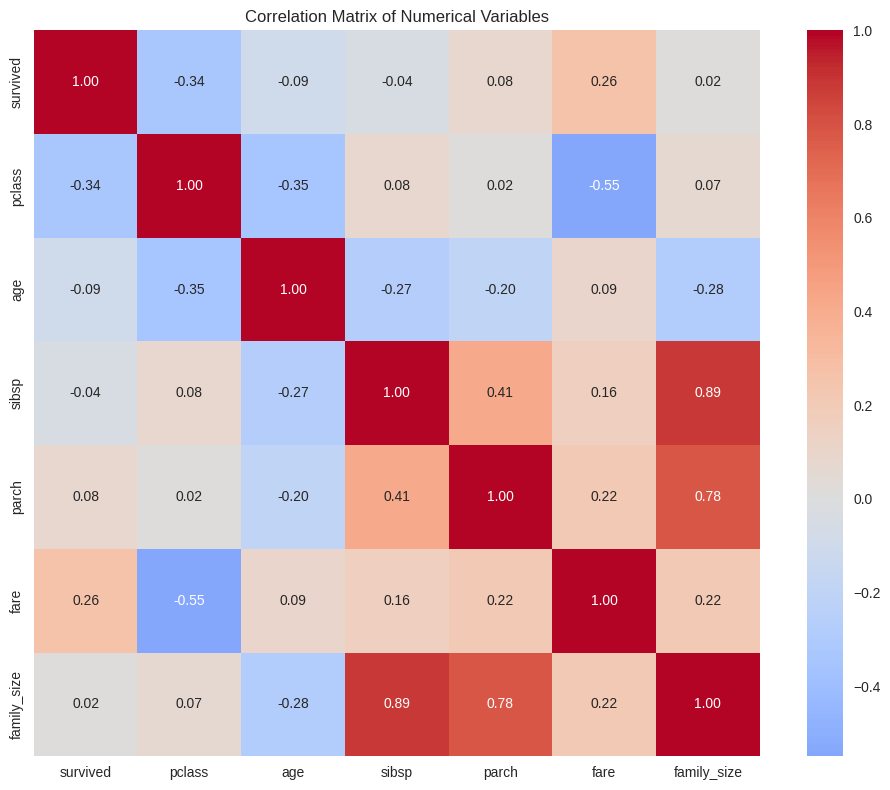

In [53]:
# 3.3 Correlation Analysis
print("\n🔗 CORRELATION ANALYSIS")
print("-" * 30)

# Select numerical columns for correlation
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')

plt.tight_layout()
plt.show()

### ViolinPlot for pClass and age vs survived || Sex and age vs survived

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


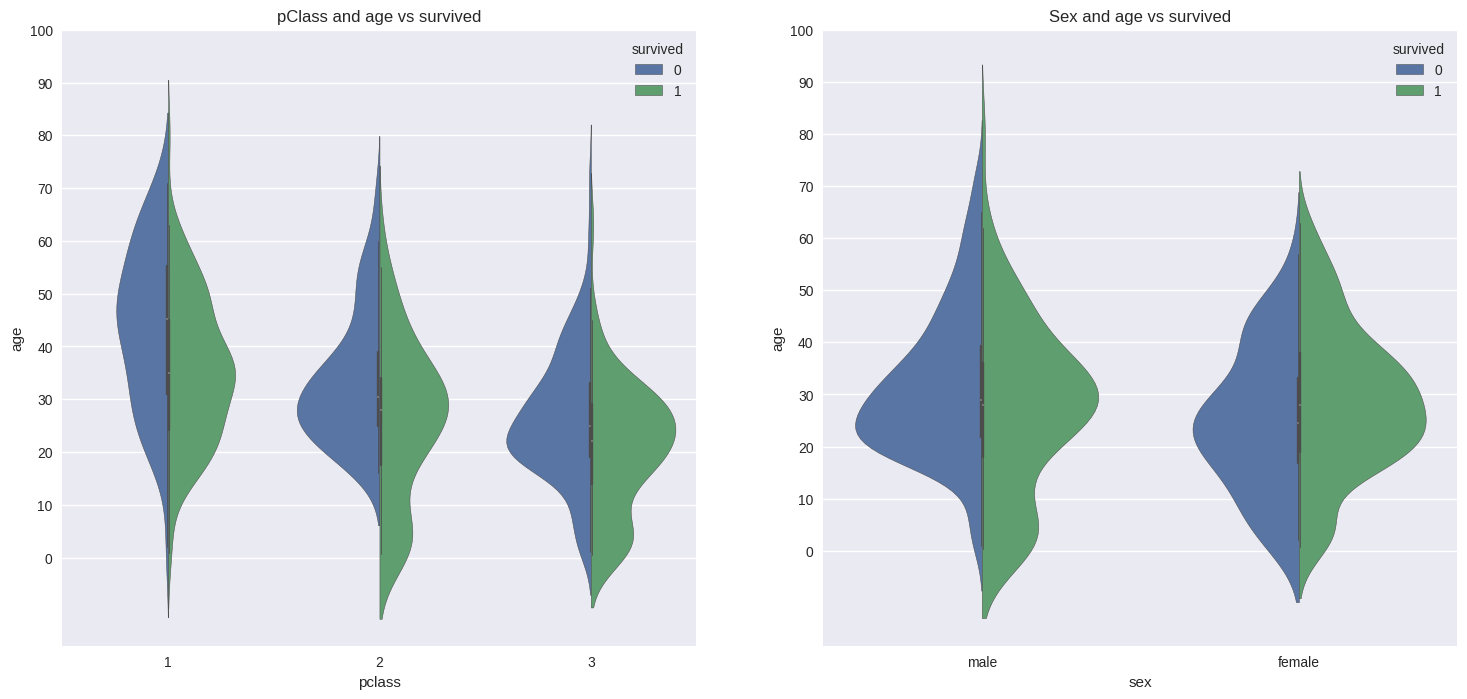

In [54]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'pclass',y = 'age',hue='survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('pClass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "sex",y = "age", hue="survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### SECTION 4: DETAILED SURVIVAL ANALYSIS


DETAILED SURVIVAL ANALYSIS

🎯 SURVIVAL BY MULTIPLE FACTORS
----------------------------------------


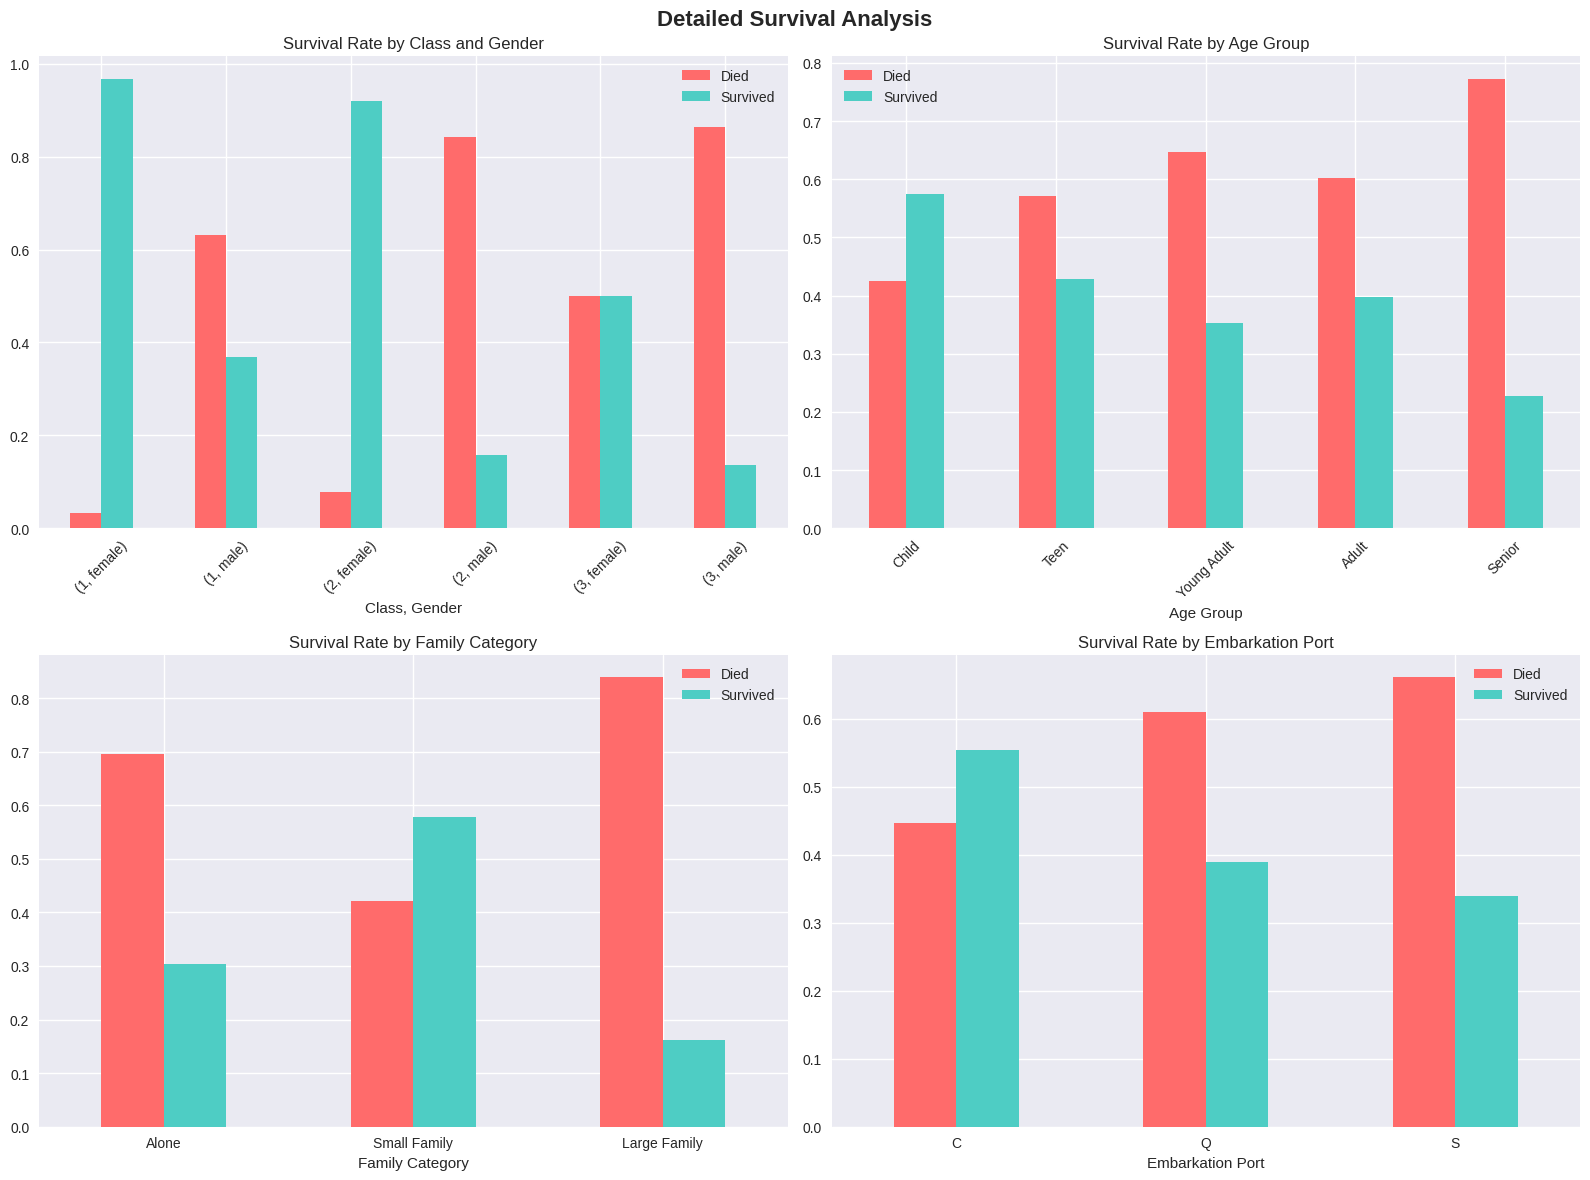

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



📈 ADVANCED VISUALIZATIONS
-----------------------------------


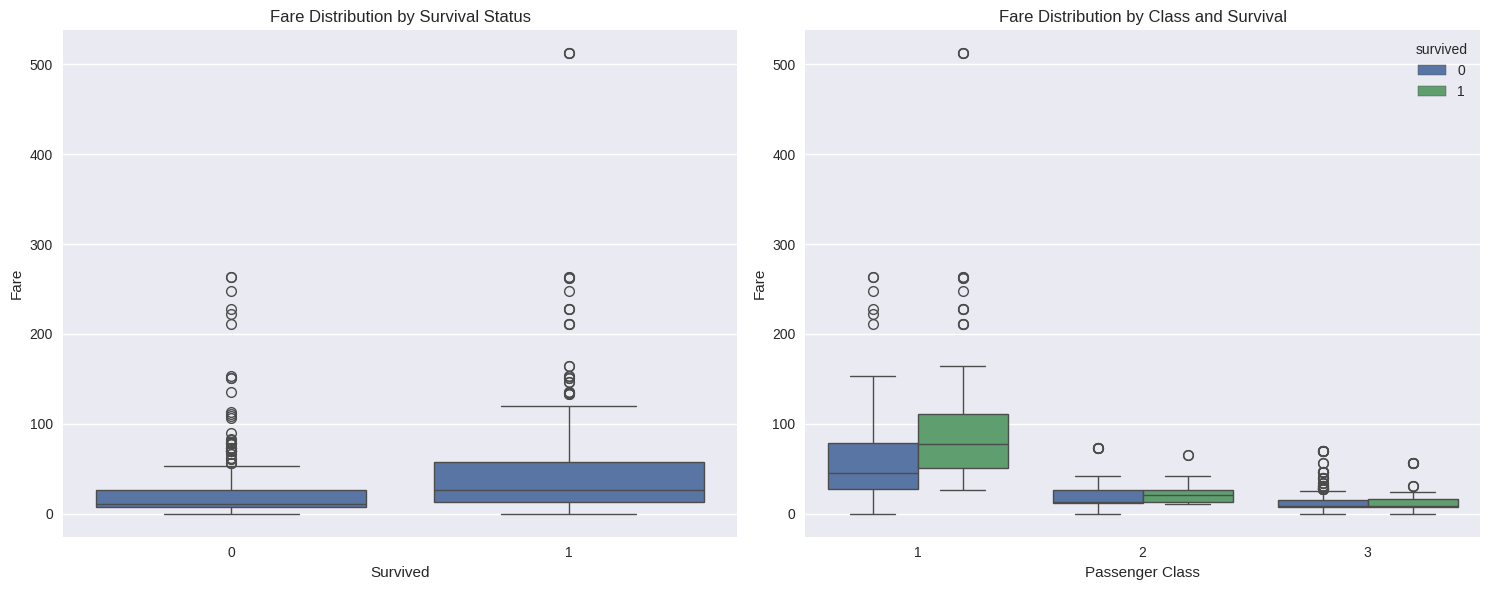

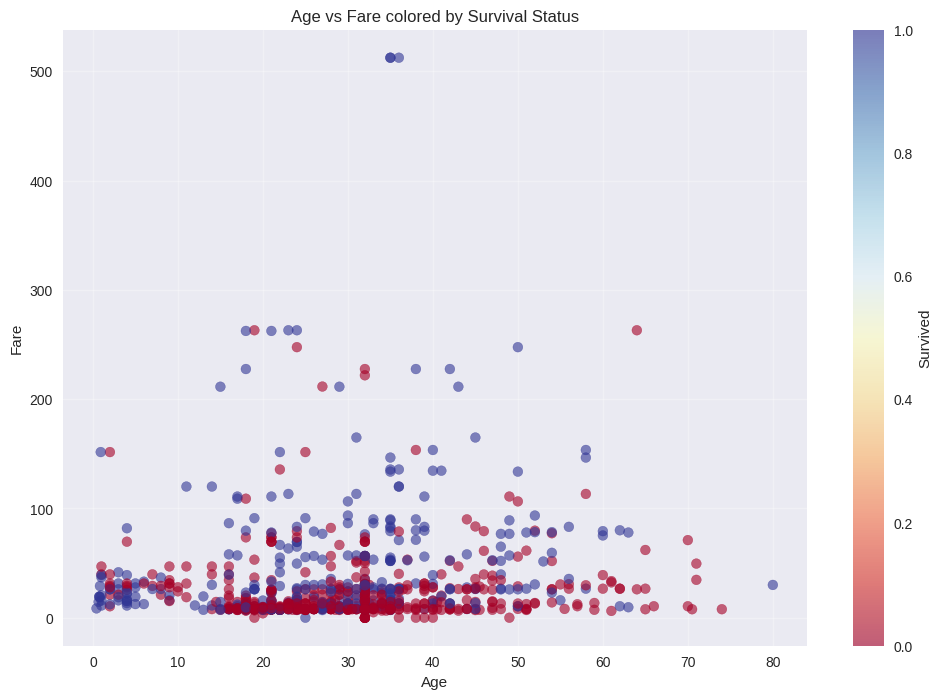

In [55]:
# ==============================================================================
# SECTION 4: DETAILED SURVIVAL ANALYSIS
# ==============================================================================

print("\n" + "="*50)
print("DETAILED SURVIVAL ANALYSIS")
print("="*50)

# 4.1 Survival by Multiple Factors
print("\n🎯 SURVIVAL BY MULTIPLE FACTORS")
print("-" * 40)

# Create comprehensive survival analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detailed Survival Analysis', fontsize=16, fontweight='bold')

# Survival by class and gender
survival_class_gender = pd.crosstab([df['pclass'], df['sex']], 
                                   df['survived'], normalize='index')
survival_class_gender.plot(kind='bar', ax=axes[0,0], color=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Survival Rate by Class and Gender')
axes[0,0].set_xlabel('Class, Gender')
axes[0,0].legend(['Died', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=45)

# Survival by age group
survival_age = pd.crosstab(df['age_group'], df['survived'], normalize='index')
survival_age.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Survival Rate by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=45)

# Survival by family size
survival_family = pd.crosstab(df['family_category'], df['survived'], normalize='index')
survival_family.plot(kind='bar', ax=axes[1,0], color=['#ff6b6b', '#4ecdc4'])
axes[1,0].set_title('Survival Rate by Family Category')
axes[1,0].set_xlabel('Family Category')
axes[1,0].legend(['Died', 'Survived'])
axes[1,0].tick_params(axis='x', rotation=0)

# Survival by embarkation port
survival_embarked = pd.crosstab(df['embarked'], df['survived'], normalize='index')
survival_embarked.plot(kind='bar', ax=axes[1,1], color=['#ff6b6b', '#4ecdc4'])
axes[1,1].set_title('Survival Rate by Embarkation Port')
axes[1,1].set_xlabel('Embarkation Port')
axes[1,1].legend(['Died', 'Survived'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 4.2 Advanced Visualizations
print("\n📈 ADVANCED VISUALIZATIONS")
print("-" * 35)

# Box plots for fare analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fare by survival status
sns.boxplot(data=df, x='survived', y='fare', ax=axes[0])
axes[0].set_title('Fare Distribution by Survival Status')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Fare')

# Fare by class and survival
sns.boxplot(data=df, x='pclass', y='fare', hue='survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Class and Survival')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

# Age vs Fare scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['age'], df['fare'], 
                     c=df['survived'], cmap='RdYlBu', alpha=0.6, s=50)
plt.colorbar(scatter, label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare colored by Survival Status')
plt.grid(True, alpha=0.3)
plt.show()

### 2.2 Key Insight 2: Survival Rate by Sex and Age

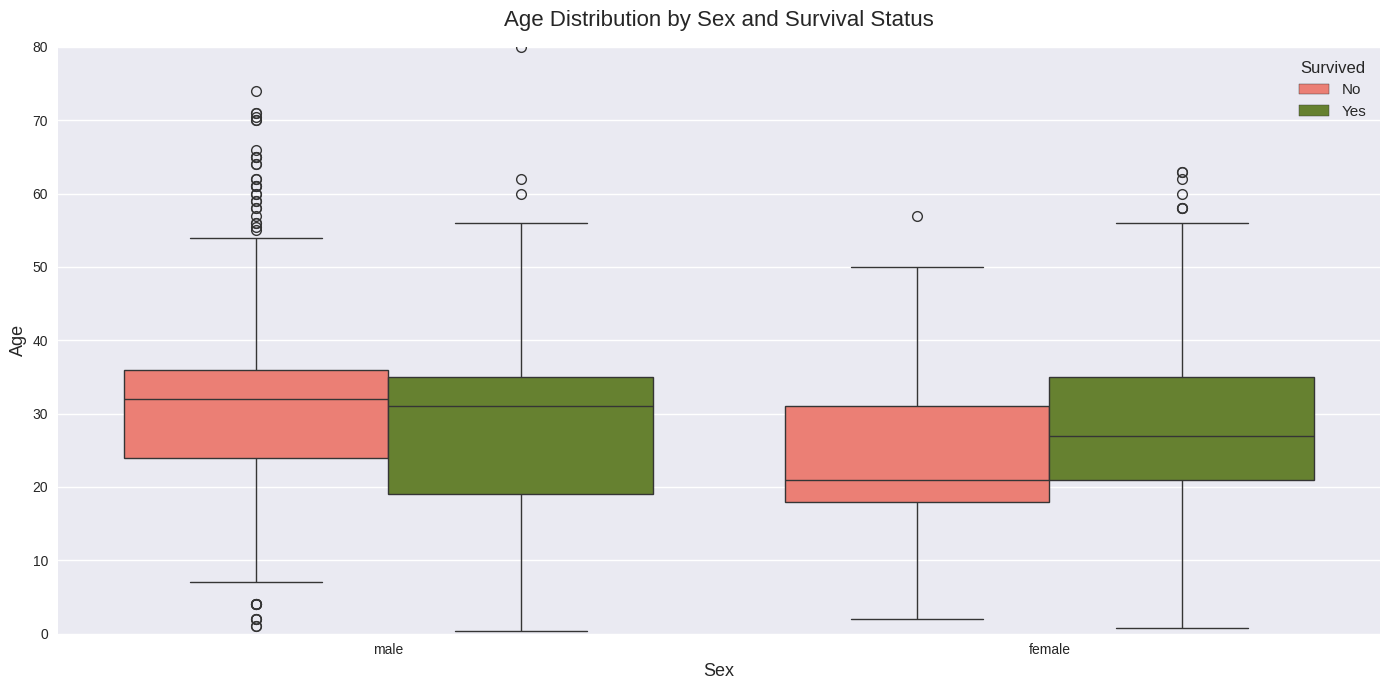

In [57]:
# 2.2 Key Insight 2: Survival Rate by Sex and Age
plt.figure(figsize=(14, 7))
sns.boxplot(
    x="sex",
    y="age",
    hue="survived",
    data=df,
    palette={0: "#FF6F61", 1: "#6B8E23"},  # Red for 'No', Olive for 'Yes'
)

# Title and axis labels
plt.title("Age Distribution by Sex and Survival Status", fontsize=16, pad=15)
plt.xlabel("Sex", fontsize=13)
plt.ylabel("Age", fontsize=13)

# Legend customization
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No", "Yes"], title="Survived", title_fontsize=12, fontsize=11)

# Optional: Focus on typical age range
plt.ylim(0, 80)

# Show and close plot
plt.tight_layout()
plt.show()
plt.close()

### SECTION 5: STATISTICAL INSIGHTS AND PATTERNS

In [58]:
# ==============================================================================
# SECTION 5: STATISTICAL INSIGHTS AND PATTERNS
# ==============================================================================

print("\n" + "="*50)
print("STATISTICAL INSIGHTS AND PATTERNS")
print("="*50)

# 5.1 Key Statistics
print("\n📊 KEY SURVIVAL STATISTICS")
print("-" * 35)

# Overall statistics
total_passengers = len(df)
total_survivors = df['survived'].sum()
survival_rate = total_survivors / total_passengers

print(f"Total Passengers: {total_passengers:,}")
print(f"Total Survivors: {total_survivors:,}")
print(f"Overall Survival Rate: {survival_rate:.2%}")


STATISTICAL INSIGHTS AND PATTERNS

📊 KEY SURVIVAL STATISTICS
-----------------------------------
Total Passengers: 891
Total Survivors: 342
Overall Survival Rate: 38.38%


In [ ]:
# Gender-based statistics
gender_stats = df.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
gender_stats['Survival_Rate'] = gender_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n👥 GENDER-BASED SURVIVAL:")
print(gender_stats)

# Class-based statistics
class_stats = df.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
class_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
class_stats['Survival_Rate'] = class_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n 🎫 CLASS-BASED SURVIVAL:")
print(class_stats)

# Age group statistics
age_stats = df.groupby('age_group')['survived'].agg(['count', 'sum', 'mean'])
age_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
age_stats['Survival_Rate'] = age_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n👶 AGE GROUP SURVIVAL:")
print(age_stats)

# 5.2 Cross-tabulation Analysis
print(f"\n📋 DETAILED CROSS-TABULATION ANALYSIS")
print("-" * 45)

# Survival by class and gender (detailed)
print("Survival by Class and Gender:")
class_gender_crosstab = pd.crosstab([df['pclass'], df['sex']], 
                                   df['survived'], margins=True)
print(class_gender_crosstab)

# Calculate survival rates
print("\nSurvival Rates by Class and Gender:")
class_gender_rates = pd.crosstab([df['pclass'], df['sex']], 
                                df['survived'], normalize='index')
print(class_gender_rates.round(3))


👥 GENDER-BASED SURVIVAL:
        Total  Survivors Survival_Rate
sex                                   
female    314        233        74.20%
male      577        109        18.89%

🎫 CLASS-BASED SURVIVAL:
        Total  Survivors Survival_Rate
pclass                                
1         216        136        62.96%
2         184         87        47.28%
3         491        119        24.24%

👶 AGE GROUP SURVIVAL:
             Total  Survivors Survival_Rate
age_group                                  
Child           73         42        57.53%
Teen            70         30        42.86%
Young Adult    530        187        35.28%
Adult          196         78        39.80%
Senior          22          5        22.73%

📋 DETAILED CROSS-TABULATION ANALYSIS
---------------------------------------------
Survival by Class and Gender:
survived         0    1  All
pclass sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       m

### SECTION 6: EXPLANATORY VISUALIZATIONS FOR PRESENTATION


EXPLANATORY VISUALIZATIONS FOR PRESENTATION

📊 CREATING EXECUTIVE SUMMARY DASHBOARD
---------------------------------------------


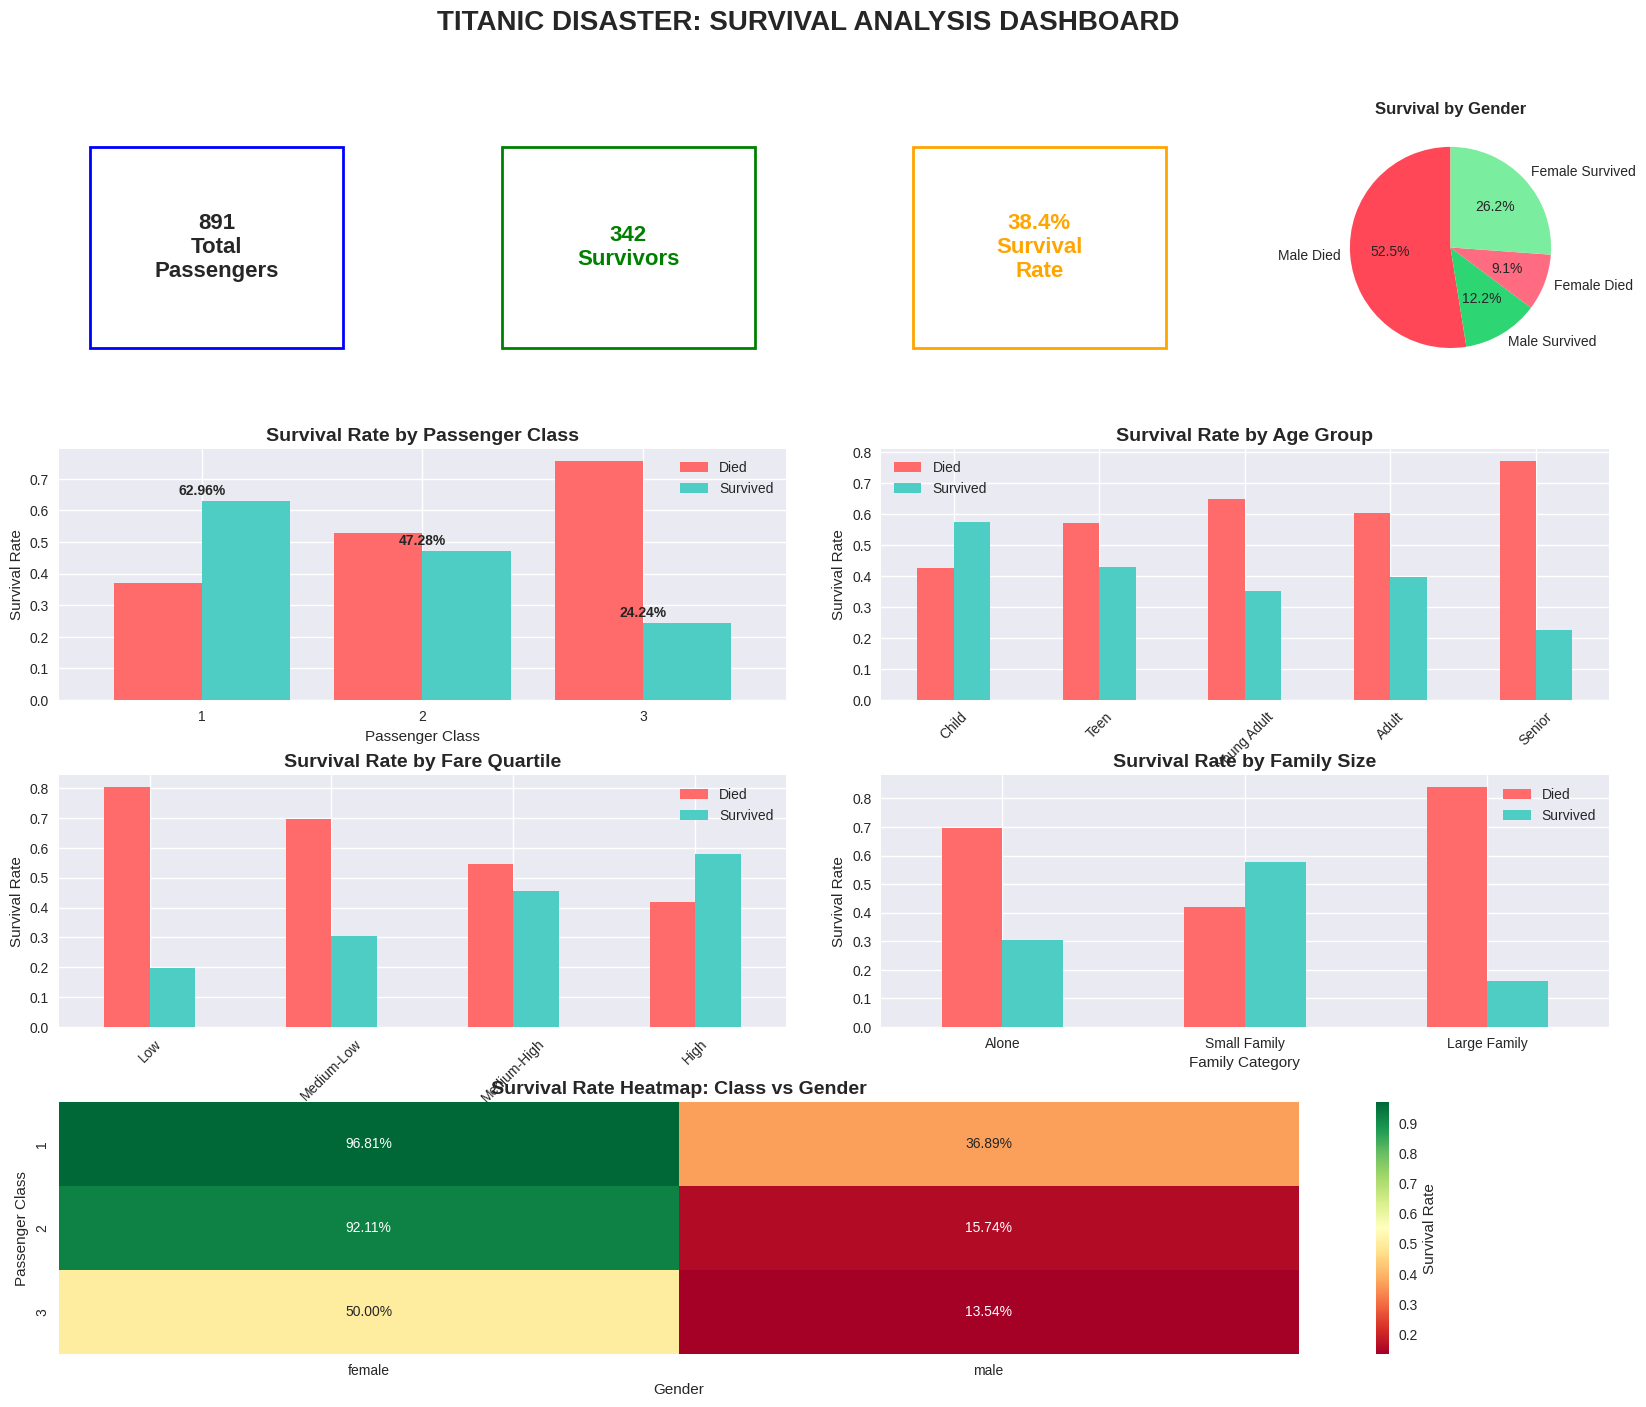

In [60]:
# ==============================================================================
# SECTION 6: EXPLANATORY VISUALIZATIONS FOR PRESENTATION
# ==============================================================================

print("\n" + "="*50)
print("EXPLANATORY VISUALIZATIONS FOR PRESENTATION")
print("="*50)

# 6.1 Executive Summary Dashboard
print("\n📊 CREATING EXECUTIVE SUMMARY DASHBOARD")
print("-" * 45)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('TITANIC DISASTER: SURVIVAL ANALYSIS DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.95)

# Key Metrics (Top row)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, f'{total_passengers:,}\nTotal\nPassengers', 
         ha='center', va='center', fontsize=16, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='blue', lw=2))

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'{total_survivors:,}\nSurvivors', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='green')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='green', lw=2))

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f'{survival_rate:.1%}\nSurvival\nRate', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='orange')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='orange', lw=2))

# Survival by Gender (Large pie chart)
ax4 = fig.add_subplot(gs[0, 3])
gender_survival = df.groupby(['sex', 'survived']).size().unstack()
colors = ['#ff6b6b', '#4ecdc4']
wedges, texts, autotexts = ax4.pie([gender_survival.loc['male', 0], gender_survival.loc['male', 1],
                                   gender_survival.loc['female', 0], gender_survival.loc['female', 1]], 
                                  labels=['Male Died', 'Male Survived', 'Female Died', 'Female Survived'],
                                  autopct='%1.1f%%', startangle=90, 
                                  colors=['#ff4757', '#2ed573', '#ff6b81', '#7bed9f'])
ax4.set_title('Survival by Gender', fontweight='bold')

# Survival by Class
ax5 = fig.add_subplot(gs[1, :2])
class_survival = pd.crosstab(df['pclass'], df['survived'], normalize='index')
class_survival.plot(kind='bar', ax=ax5, color=['#ff6b6b', '#4ecdc4'], width=0.8)
ax5.set_title('Survival Rate by Passenger Class', fontweight='bold', fontsize=14)
ax5.set_xlabel('Passenger Class')
ax5.set_ylabel('Survival Rate')
ax5.legend(['Died', 'Survived'], loc='upper right')
ax5.tick_params(axis='x', rotation=0)
for i, v in enumerate(class_survival[1]):
    ax5.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# Age Distribution
ax6 = fig.add_subplot(gs[1, 2:])
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['age_bins'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_survival = pd.crosstab(df['age_bins'], df['survived'], normalize='index')
age_survival.plot(kind='bar', ax=ax6, color=['#ff6b6b', '#4ecdc4'])
ax6.set_title('Survival Rate by Age Group', fontweight='bold', fontsize=14)
ax6.set_xlabel('Age Group')
ax6.set_ylabel('Survival Rate')
ax6.legend(['Died', 'Survived'])
ax6.tick_params(axis='x', rotation=45)

# Fare Analysis
ax7 = fig.add_subplot(gs[2, :2])
fare_quartiles = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
fare_survival = pd.crosstab(fare_quartiles, df['survived'], normalize='index')
fare_survival.plot(kind='bar', ax=ax7, color=['#ff6b6b', '#4ecdc4'])
ax7.set_title('Survival Rate by Fare Quartile', fontweight='bold', fontsize=14)
ax7.set_xlabel('Fare Quartile')
ax7.set_ylabel('Survival Rate')
ax7.legend(['Died', 'Survived'])
ax7.tick_params(axis='x', rotation=45)

# Family Size Impact
ax8 = fig.add_subplot(gs[2, 2:])
family_survival = pd.crosstab(df['family_category'], df['survived'], normalize='index')
family_survival.plot(kind='bar', ax=ax8, color=['#ff6b6b', '#4ecdc4'])
ax8.set_title('Survival Rate by Family Size', fontweight='bold', fontsize=14)
ax8.set_xlabel('Family Category')
ax8.set_ylabel('Survival Rate')
ax8.legend(['Died', 'Survived'])
ax8.tick_params(axis='x', rotation=0)

# Heat map of survival by class and gender
ax9 = fig.add_subplot(gs[3, :])  
pivot_survival = df.pivot_table(values='survived', index='pclass', columns='sex', aggfunc='mean')
sns.heatmap(pivot_survival, annot=True, fmt='.2%', cmap='RdYlGn', ax=ax9, 
            cbar_kws={'label': 'Survival Rate'})
ax9.set_title('Survival Rate Heatmap: Class vs Gender', fontweight='bold', fontsize=14)
ax9.set_xlabel('Gender')
ax9.set_ylabel('Passenger Class')

plt.show()

### SECTION 7: KEY FINDINGS AND INSIGHTS

In [65]:
print("\n" + "="*50)
print("KEY FINDINGS AND INSIGHTS")
print("="*50)

print("\n🔍 CRITICAL INSIGHTS FROM THE ANALYSIS:")
print("-" * 45)

# Calculate key insights
female_survival_rate = df[df['sex'] == 'female']['survived'].mean()
male_survival_rate = df[df['sex'] == 'male']['survived'].mean()
first_class_survival = df[df['pclass'] == 1]['survived'].mean()
third_class_survival = df[df['pclass'] == 3]['survived'].mean()
child_survival = df[df['age'] < 12]['survived'].mean()

insights = [
    f"1. GENDER IMPACT: Women had a {female_survival_rate:.1%} survival rate vs {male_survival_rate:.1%} for men",
    f"   - This represents a {female_survival_rate/male_survival_rate:.1f}x higher survival rate for women",
    f"",
    f"2. CLASS DISTINCTION: First-class passengers had {first_class_survival:.1%} survival rate",
    f"   - Third-class passengers had only {third_class_survival:.1%} survival rate",
    f"   - {first_class_survival/third_class_survival:.1f}x higher survival rate for first-class",
    f"",
    f"3. AGE FACTOR: Children under 12 had {child_survival:.1%} survival rate",
    f"   - 'Women and children first' policy was largely followed",
    f"",
    f"4. FAMILY SIZE: Small families (2-4 members) had better survival rates",
    f"   - Large families and solo travelers faced higher mortality",
    f"",
    f"5. FARE CORRELATION: Higher fare generally correlated with better survival",
    f"   - This reflects the class-based survival pattern"
]

for insight in insights:
    print(insight)

print(f"\n💡 RECOMMENDATIONS FOR MARITIME SAFETY:")
print("-" * 45)
recommendations = [
    "• Ensure adequate lifeboats for ALL passengers, not just first-class",
    "• Implement fair evacuation procedures regardless of passenger class",
    "• Prioritize vulnerable populations (children, elderly) in emergency protocols",
    "• Provide emergency training to all passengers, not just crew",
    "• Design ships with better compartmentalization for improved survivability"
]

for rec in recommendations:
    print(rec)


KEY FINDINGS AND INSIGHTS

🔍 CRITICAL INSIGHTS FROM THE ANALYSIS:
---------------------------------------------
1. GENDER IMPACT: Women had a 74.2% survival rate vs 18.9% for men
   - This represents a 3.9x higher survival rate for women

2. CLASS DISTINCTION: First-class passengers had 63.0% survival rate
   - Third-class passengers had only 24.2% survival rate
   - 2.6x higher survival rate for first-class

3. AGE FACTOR: Children under 12 had 56.9% survival rate
   - 'Women and children first' policy was largely followed

4. FAMILY SIZE: Small families (2-4 members) had better survival rates
   - Large families and solo travelers faced higher mortality

5. FARE CORRELATION: Higher fare generally correlated with better survival
   - This reflects the class-based survival pattern

💡 RECOMMENDATIONS FOR MARITIME SAFETY:
---------------------------------------------
• Ensure adequate lifeboats for ALL passengers, not just first-class
• Implement fair evacuation procedures regardless of

### Crafting new features for better analysis

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


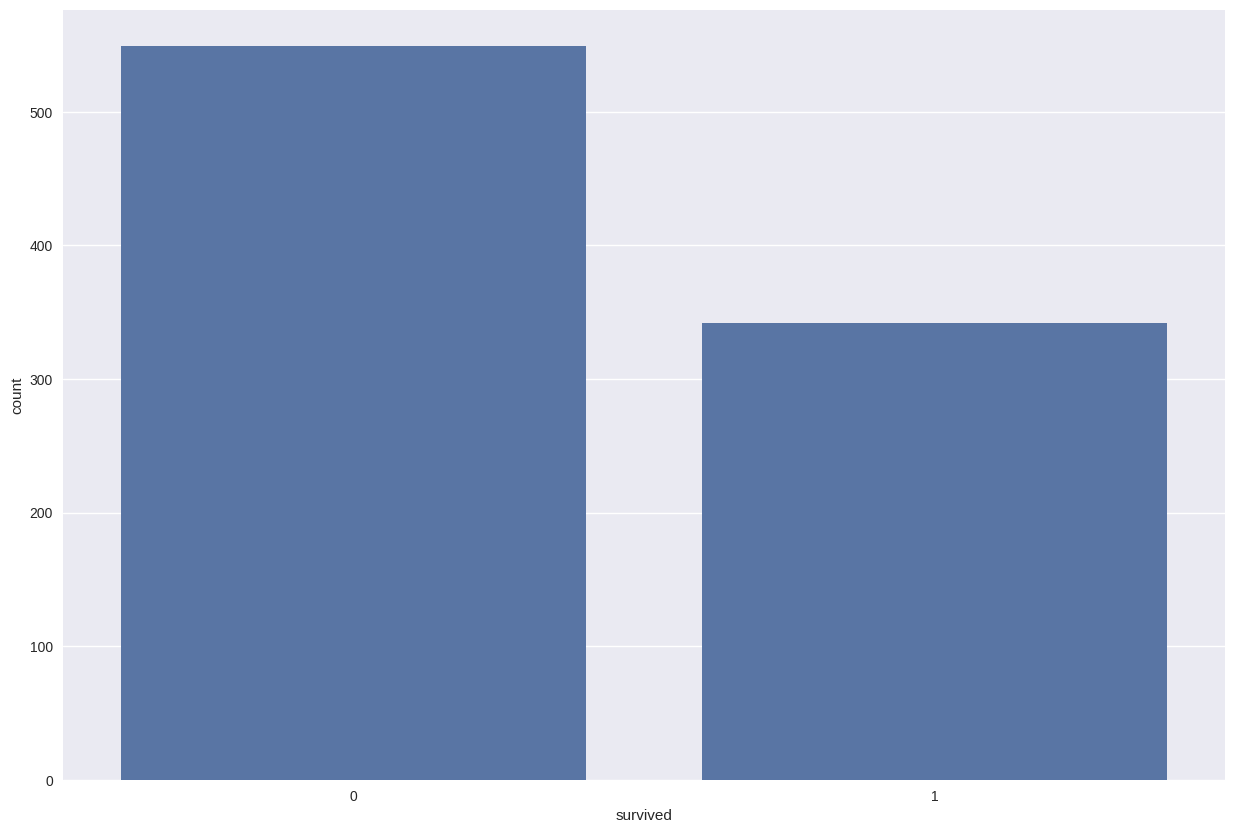

In [74]:
sns.countplot(x='survived', data=train_data)
plt.show()


From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Here we'll explore features

In [75]:
train_data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [76]:
train_data.groupby(['sex','survived']).count()

passengerid  pclass  name  age  sibsp  parch  ticket  fare  \
sex    survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 cabin  embarked  
sex    survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

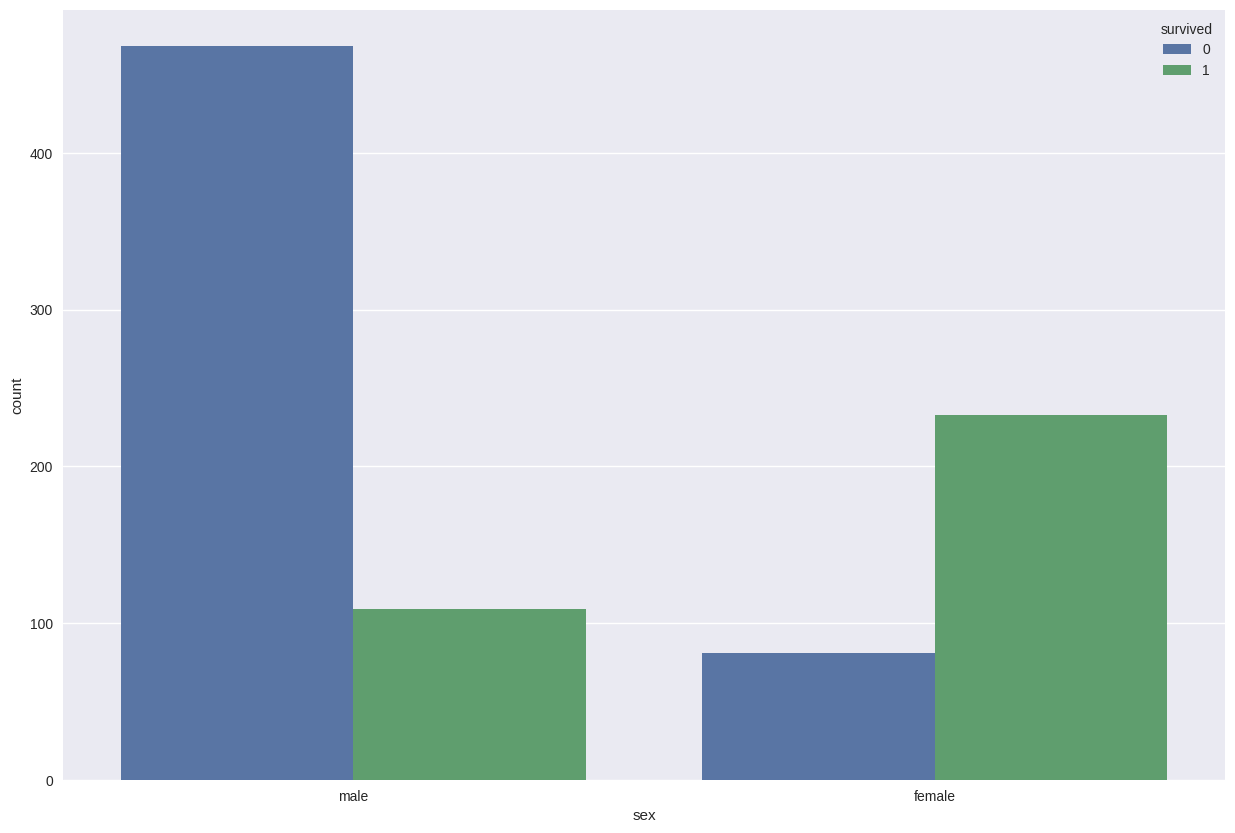

In [77]:
sns.countplot(x = 'sex',hue='survived',data=train_data)
plt.show()

'Sex' is very interesting feature. Isn't it? Let's explore more features


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


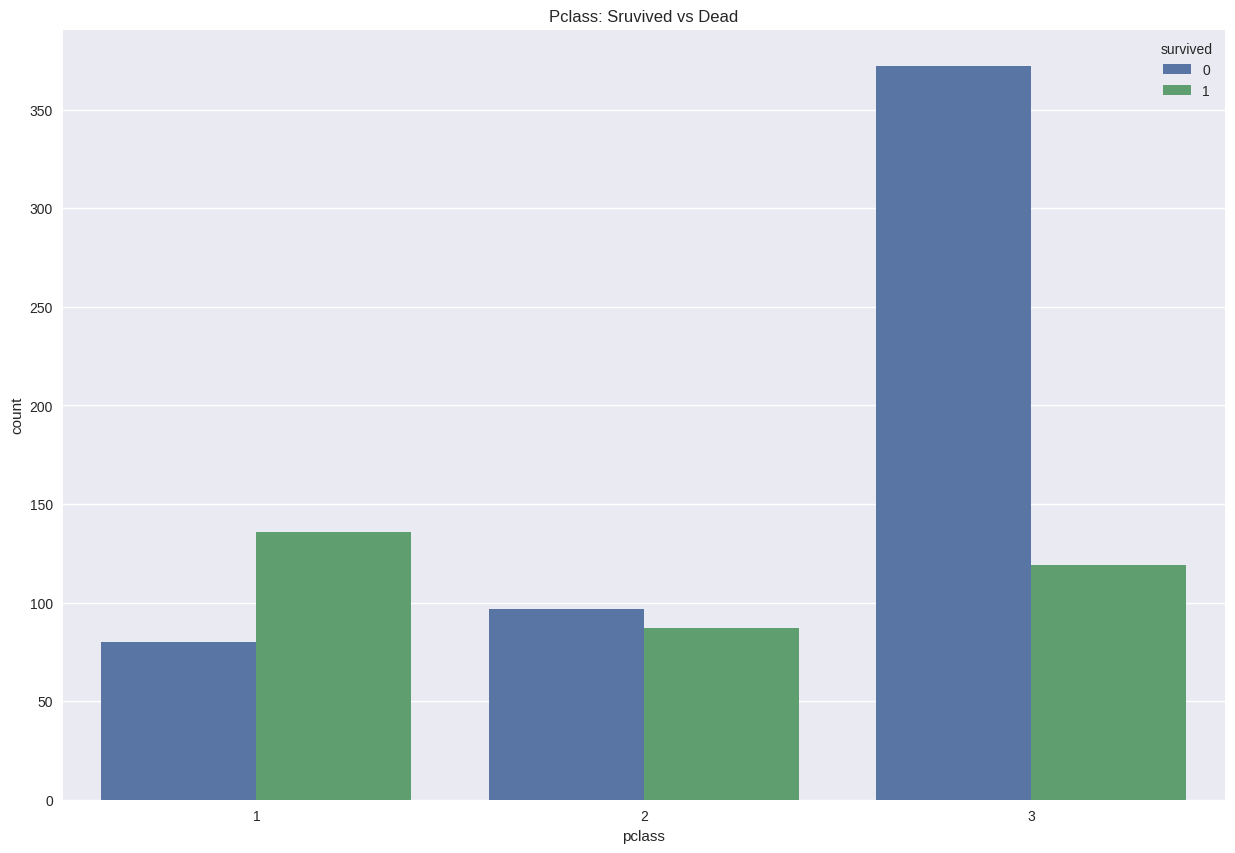

In [78]:
sns.countplot(x = 'pclass', hue='survived', data=train_data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

Wow.... That looks amazing. It is usually said that Money can't buy Everything, But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived. So money and status matters here.

Let's dive in again into data to check more interesting observations.

In [82]:
pd.crosstab([train_data.sex, train_data.survived], train_data.pclass,
            margins=True)\
.style.background_gradient(cmap='summer_r')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


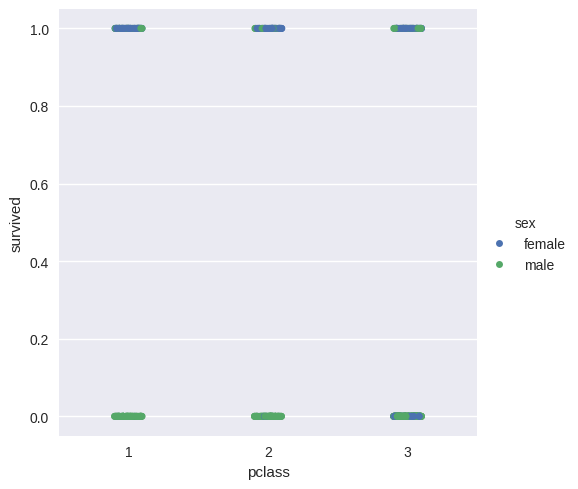

In [83]:
sns.catplot(x = 'pclass', y = 'survived', hue='sex', data=train_data)    # catplot  kind='point'
plt.show()

I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.


In [85]:
print('Oldest person Survived was of:',train_data[train_data['survived']==1]['age'].max())
print('Youngest person survived was of:',train_data[train_data['survived']==1]['age'].min())
print('Average person survived was of:',train_data[train_data['survived']==1]['age'].mean())

Oldest person Survived was of: 80.0
Youngest person survived was of: 0.42
Average person survived was of: 28.343689655172415


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


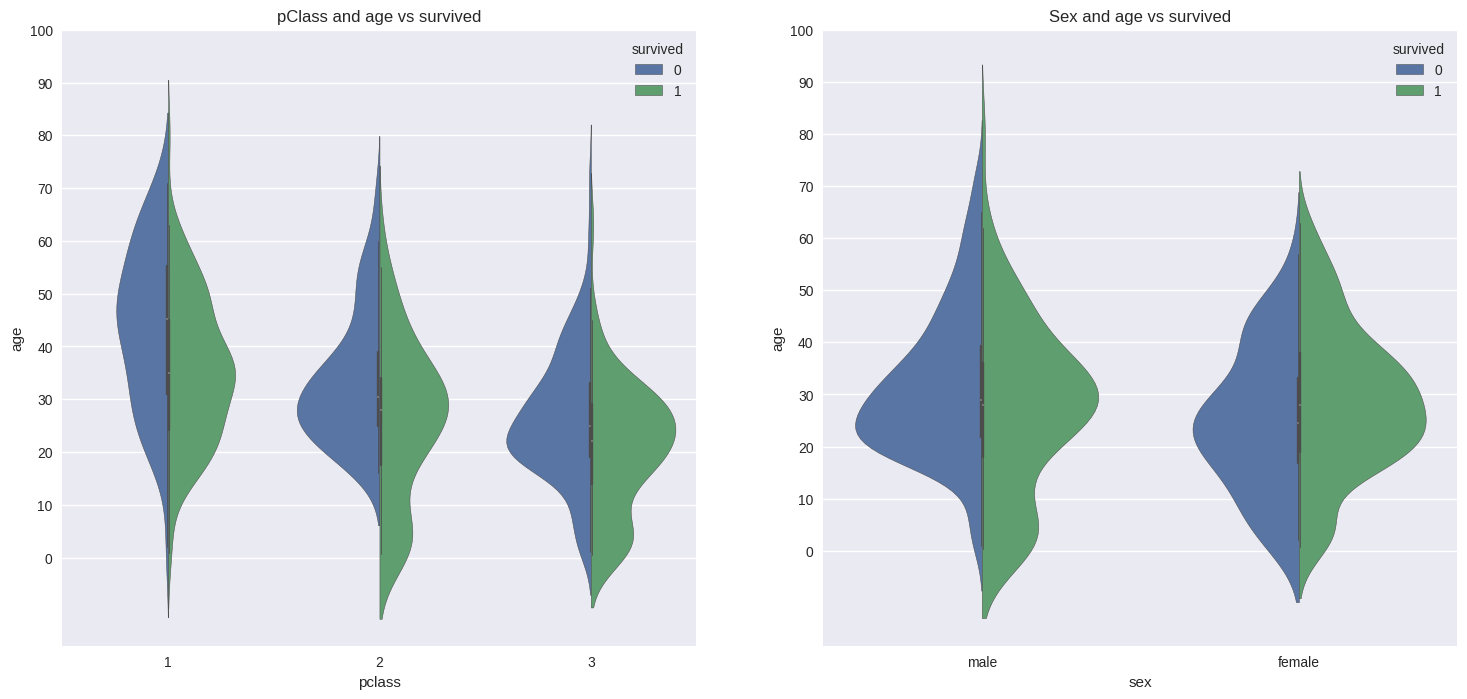

In [86]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = 'pclass',y = 'age',hue='survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('pClass and age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "sex",y = "age", hue="survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From above violen plots, following observations are clear,

The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two.
Survival rate of children, for age 10 and below is good irrespective of Class
Survival rate between age 20-30 is well and is quite better for women.
Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. Let's do something more interesting with dataset by exploring more.

What is, if I look at 'Name' feature, It looks interesting. Let's check it....

In [89]:
print(train_data.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'Initial'],
      dtype='object')


In [90]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [92]:
pd.crosstab(train_data.Initial,train_data.sex)\
.T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [93]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [97]:
train_data.groupby('Initial')['age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: age, dtype: float64

In [98]:
train_data.sample(2,random_state=3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Initial
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S,Mr
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S,Mrs


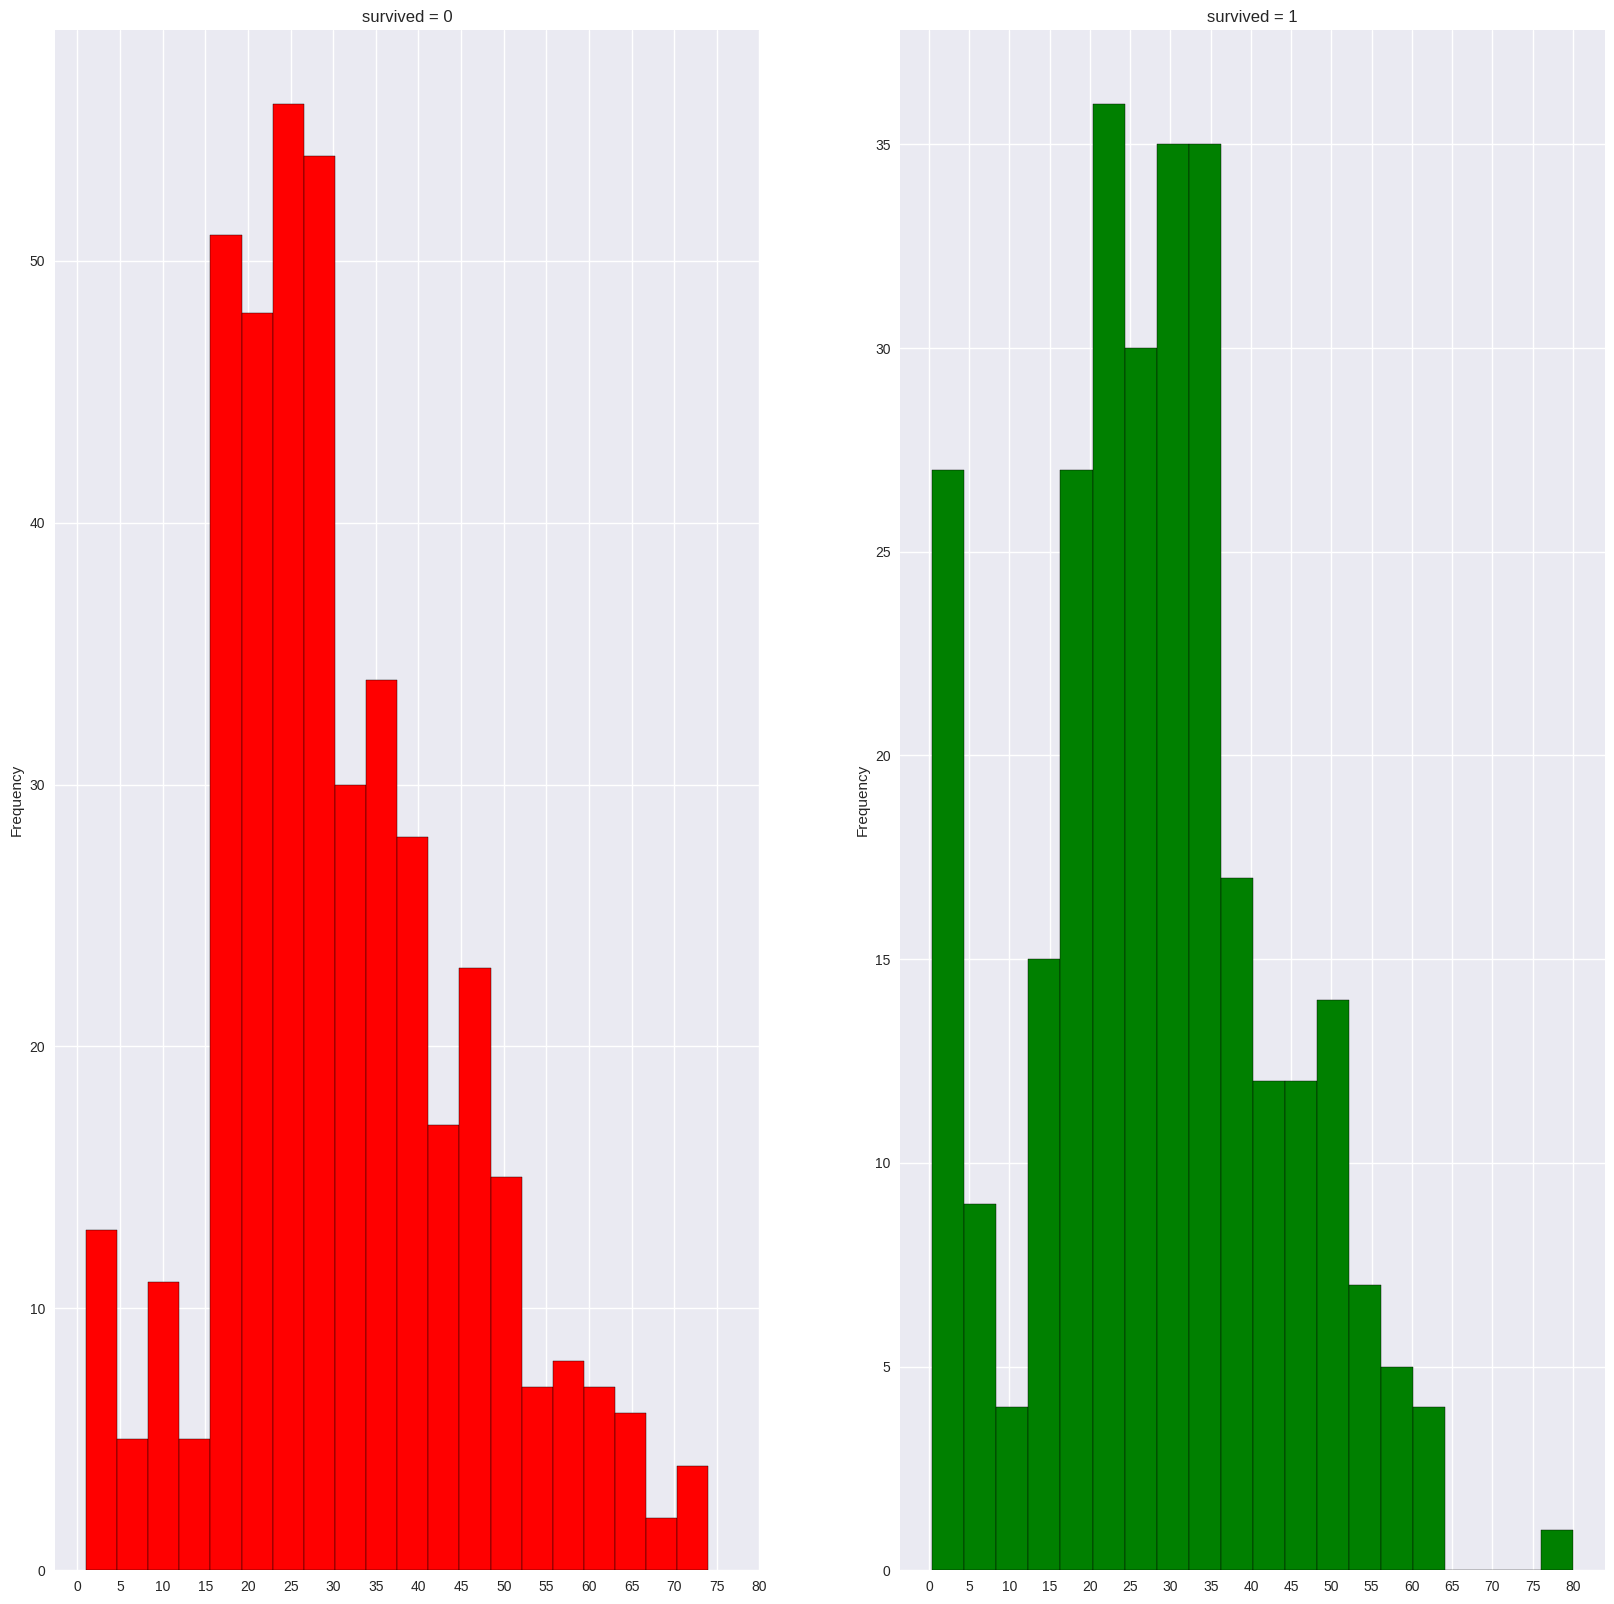

In [104]:
f,ax = plt.subplots(1,2,figsize=(20,20))

train_data[train_data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

train_data[train_data['survived']==1].age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('survived = 1')

plt.show()

From the above plots, I found the following observations

(1) First priority during Rescue is given to children and women, as the persons<5 are save by large numbers (2) The oldest saved passanger is of 80 (3) The most deaths were between 30-40

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


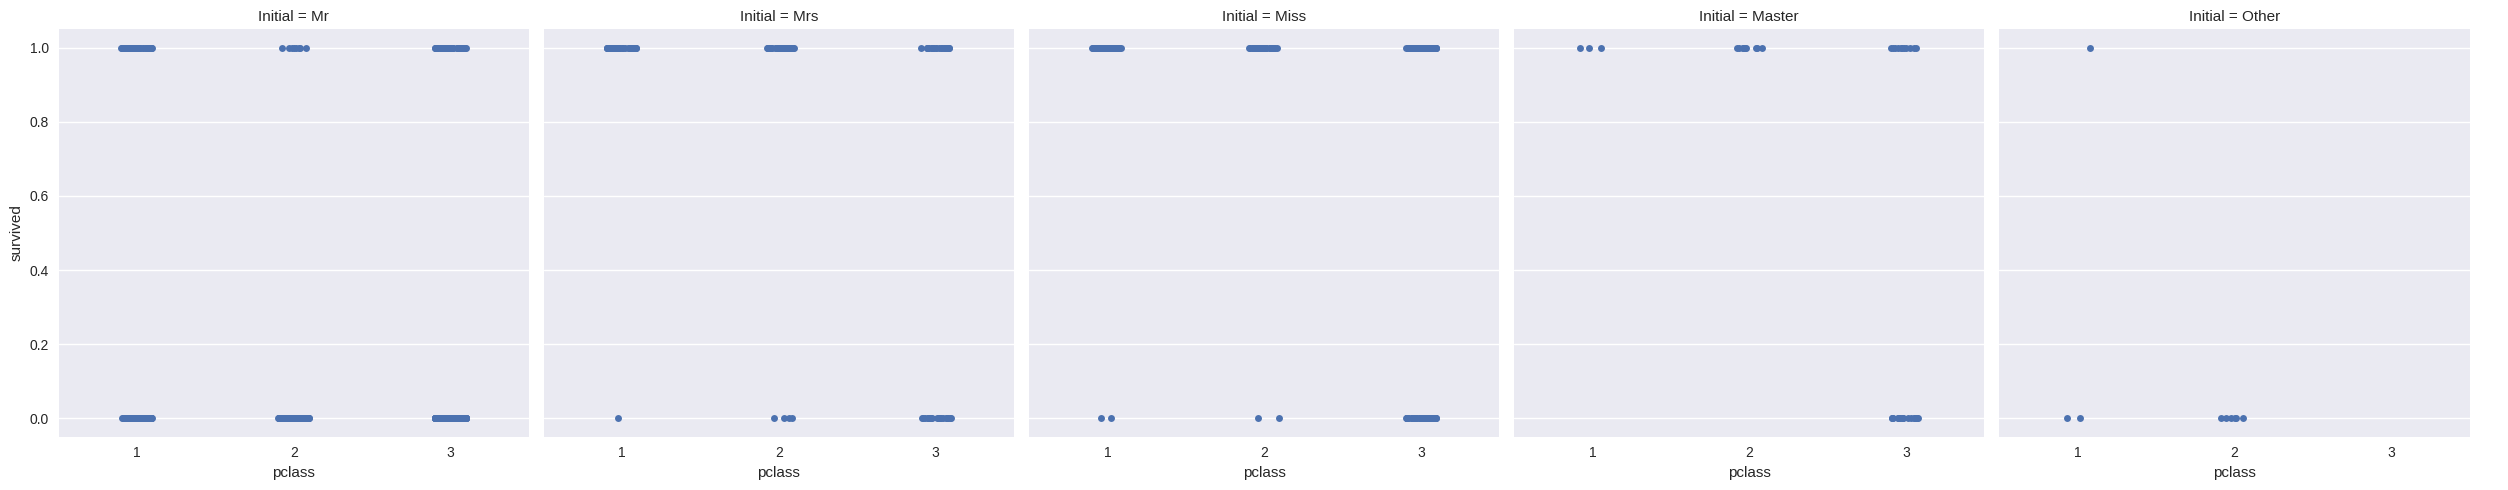

In [107]:
sns.catplot(x= 'pclass',y='survived',col='Initial',data=train_data) #catplot---- kind='point
plt.show()

From the above FactorPlots it is Clearly seen that women and children were saved irrespective of PClass

Let's explore some more

### Feature: SibSp

SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

In [112]:
print(train_data.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'Initial'],
      dtype='object')


In [113]:
pd.crosstab([train_data.sibsp],train_data.survived)\
.style.background_gradient('summer_r')

survived,0,1
sibsp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


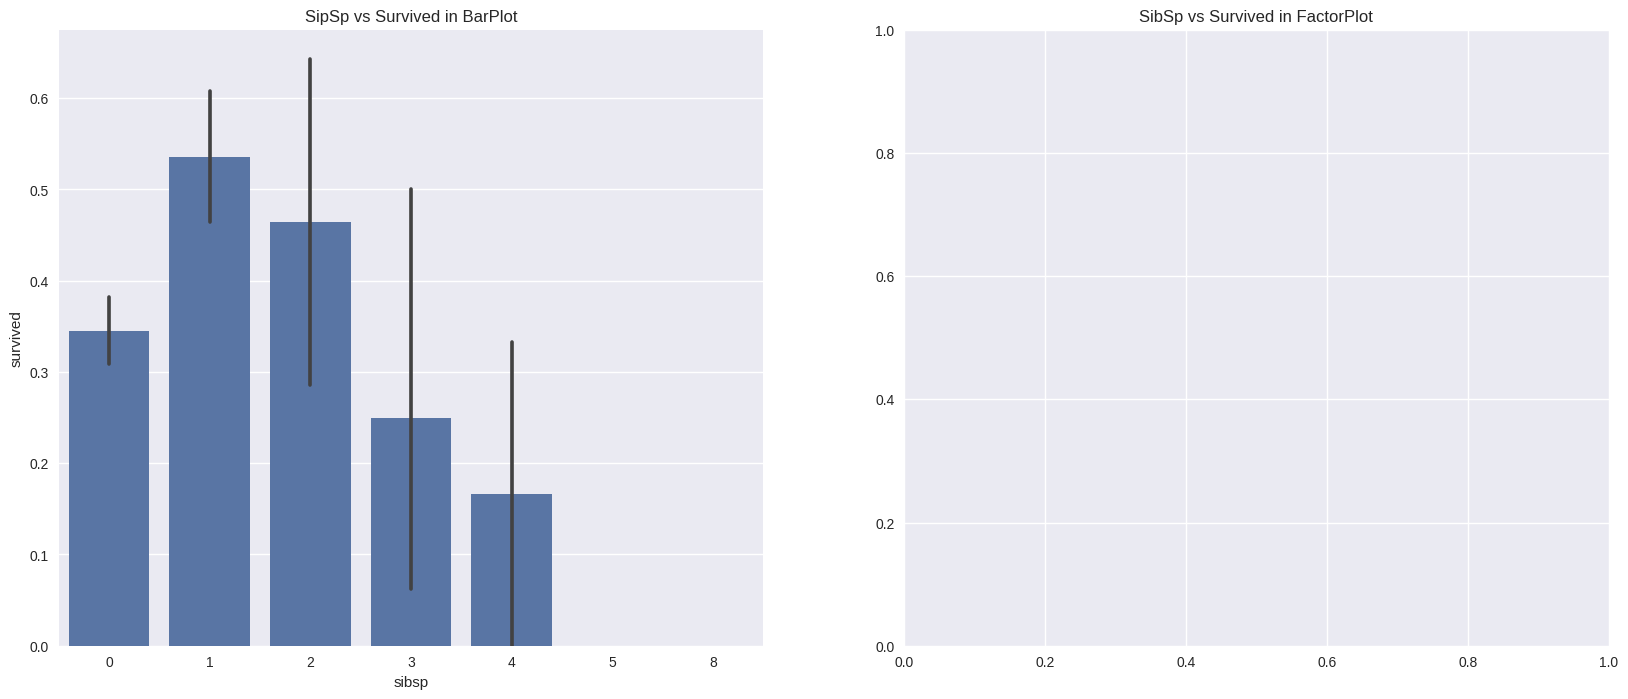

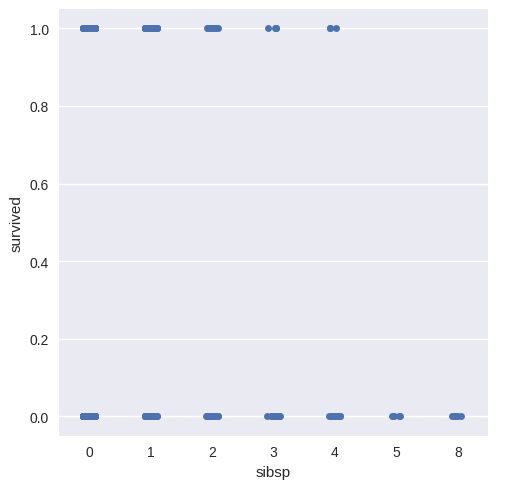

In [116]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x = 'sibsp',y = 'survived', data=train_data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.catplot(x = 'sibsp',y = 'survived', data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
# plt.close()
plt.show()

In [118]:
pd.crosstab(train_data.sibsp,train_data.pclass).style.background_gradient('summer_r')

pclass,1,2,3
sibsp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass? Yes this is PClass, The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.


That are some interesting facts we have observed with Titanic dataset.